## Asunciones Regresión Lineal

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

>Cada asunción la deberéis testar de forma visual y analítica.

In [62]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

from scipy import stats
import researchpy as rp
from scipy.stats import levene
from scipy.stats import kstest

plt.rcParams["figure.figsize"] = (10,8) 
pd.options.display.max_columns = None

In [63]:
df = pd.read_csv('archivos/coste_de_vida_final.csv', index_col = 0)

In [64]:
df.sample(3)

,city,country,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk_1l,Rice_1kg,Eggs_12uds,Chicken_Fillets_1kg,Beef_Round_1kg,Water_1.5l_market,Wine_market,Domestic_Beer_0.5l_market,Imported_Beer_0.33l_market,Cigarettes_20_Pack_Marlboro,One-way_Ticket_Local_Transport,Monthly_Pass_Regular_Price,Taxi_1km_Normal_Tariff,Gasoline_1l,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema_1Seat,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate_%_Yearly_20_Years,data_quality
1246,Yakutsk,Russia,11.20,32.00,8.00,2.88,1.66,1.91,2.32,5.58,9.47,1.33,8.47,1.71,2.76,2.4,0.56,19.20,0.80,0.89,170.06,NaN,16.18,74.00,5.60,176.00,NaN,592.00,400.00,1034.67,656.00,2186.67,1600.00,986.67,8.75,0
2358,Sassari,Italy,12.64,52.69,8.43,1.40,0.94,2.50,2.03,8.69,12.12,0.28,5.53,1.11,1.29,5.8,1.37,39.25,2.11,2.05,210.75,0.16,26.34,42.15,8.43,491.75,6849.34,553.22,432.04,763.97,648.05,3969.11,2915.36,1299.62,1.79,0
1800,Braila,Romania,7.49,32.11,6.64,1.71,1.28,1.41,2.38,4.24,8.03,0.53,4.28,0.66,1.20,4.5,0.54,11.24,0.45,1.68,124.33,0.05,7.71,23.55,7.49,214.08,4709.81,220.48,160.17,276.68,180.94,804.63,614.97,541.71,7.67,0


In [65]:
list(df['Basic'].unique())

[182.13,
 66.0,
 59.65,
 43.57,
 58.07,
 37.06,
 128.77,
 83.88,
 67.63,
 553.99,
 79.55,
 66.56,
 26.53,
 69.27,
 48.85,
 28.27,
 31.81,
 55.64,
 145.92,
 171.22,
 98.89,
 180.61,
 68.88,
 48.19,
 24.93,
 92.43,
 33.92,
 36.49,
 299.36,
 40.46,
 28.69,
 21.1,
 199.44,
 206.04,
 74.15,
 140.05,
 36.3,
 71.32,
 93.12,
 76.64,
 67.77,
 52.99,
 30.78,
 45.79,
 163.78,
 74.36,
 45.92,
 42.69,
 39.47,
 25.46,
 49.82,
 92.53,
 53.62,
 56.41,
 67.58,
 53.07,
 89.91,
 42.81,
 199.78,
 92.87,
 38.07,
 59.83,
 138.18,
 48.49,
 35.59,
 48.9,
 92.83,
 39.99,
 156.11,
 37.01,
 47.45,
 123.31,
 34.2,
 166.08,
 41.59,
 34.17,
 32.39,
 nan,
 31.79,
 170.42,
 41.97,
 63.46,
 84.52,
 166.22,
 28.18,
 43.29,
 71.18,
 173.45,
 213.22,
 53.86,
 64.83,
 127.96,
 145.68,
 159.71,
 75.63,
 131.53,
 49.32,
 38.09,
 21.56,
 70.83,
 42.71,
 185.0,
 133.25,
 72.6,
 170.85,
 148.65,
 37.98,
 36.92,
 21.35,
 56.94,
 106.1,
 31.99,
 209.47,
 75.22,
 13.51,
 43.6,
 181.61,
 221.73,
 104.88,
 308.3,
 46.76,
 48.36,
 1

In [66]:
df['Basic'].isnull().sum()

488

In [67]:
df['Basic'].describe()

count    4468.000000
mean      136.254584
std        85.048918
min         6.070000
25%        68.780000
50%       128.085000
75%       185.000000
max      1066.670000
Name: Basic, dtype: float64

<AxesSubplot:>

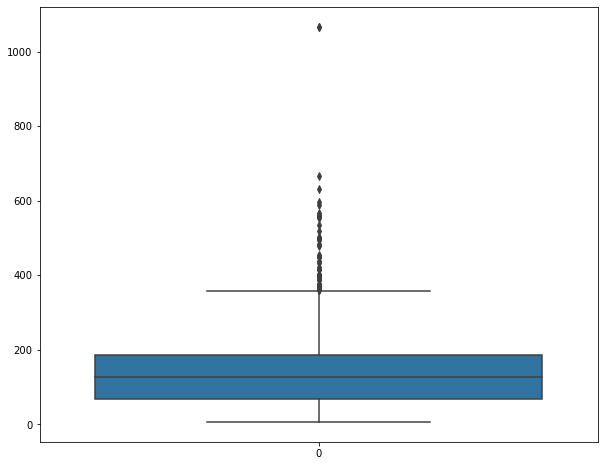

In [68]:
sns.boxplot(df['Basic'])

In [69]:
# df['Basic'].fillna(df['Basic'].median(), inplace = True)

In [70]:
df['Basic'].replace(np.nan, df['Basic'].median(), inplace = True)

In [71]:
df['Basic'].isnull().sum()

0

In [72]:
# df['Basic'] = pd.to_numeric(df['Basic'], errors = 'coerce')

In [73]:
# df.astype({'Basic': 'float'}).dtypes

In [74]:
df['Basic'].dtypes

dtype('float64')

In [75]:
df.shape

(4956, 36)

1- Normalidad (ya la deberíais haber evaluado)

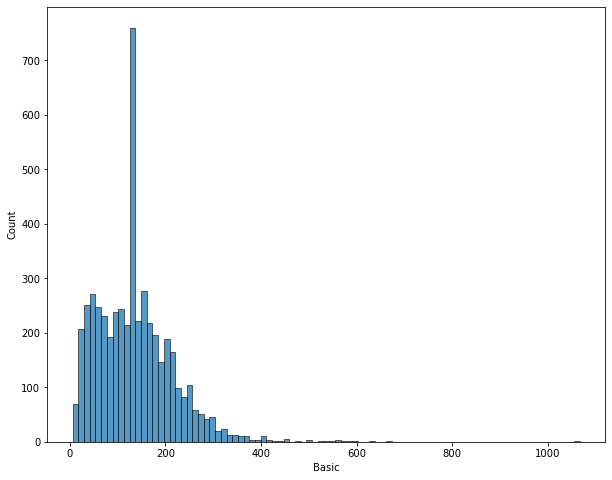

In [76]:
sns.histplot(df['Basic']);

In [77]:
stats.shapiro(df["Basic"])

ShapiroResult(statistic=0.9127979278564453, pvalue=0.0)

Buscamos una variable que sí cumpla con el criterio de normalidad hasta que aprendamos a normalizar los datos.

In [78]:
numericas = df.select_dtypes(np.number)

In [79]:
for col in numericas.columns:
    numericas[col].replace(np.nan, numericas[col].median(), inplace = True)

In [80]:
numericas.stb.missing().T

,Meal_Inexpensive_Restaurant,Apt_1bed_inCentre,Prepaid_Mobile,Internet,Gym_Monthly,Cinema_1Seat,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_OutsideCentre,Mealfor2_Midrange_Restaurant,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate_%_Yearly_20_Years,Basic,Gasoline_1l,Taxi_1km_Normal_Tariff,Monthly_Pass_Regular_Price,One-way_Ticket_Local_Transport,Cigarettes_20_Pack_Marlboro,Imported_Beer_0.33l_market,Domestic_Beer_0.5l_market,Wine_market,Water_1.5l_market,Beef_Round_1kg,Chicken_Fillets_1kg,Eggs_12uds,Rice_1kg,Milk_1l,Cappuccino,McMeal_at_McDonalds,data_quality
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
for col in numericas.columns:
    print(f'{col} = {stats.shapiro(numericas[col])[1]}')

Meal_Inexpensive_Restaurant = 1.6815581571897805e-44
Mealfor2_Midrange_Restaurant = 7.318522813791607e-38
McMeal_at_McDonalds = 1.0020215066836577e-33
Cappuccino = 5.438064442610221e-30
Milk_1l = 0.0
Rice_1kg = 0.0
Eggs_12uds = 1.401298464324817e-45
Chicken_Fillets_1kg = 0.0
Beef_Round_1kg = 0.0
Water_1.5l_market = 0.0
Wine_market = 0.0
Domestic_Beer_0.5l_market = 0.0
Imported_Beer_0.33l_market = 0.0
Cigarettes_20_Pack_Marlboro = 0.0
One-way_Ticket_Local_Transport = 0.0
Monthly_Pass_Regular_Price = 0.0
Taxi_1km_Normal_Tariff = 0.0
Gasoline_1l = 8.746565101010705e-34
Basic = 0.0
Prepaid_Mobile = 0.0
Internet = 0.0
Gym_Monthly = 0.0
Cinema_1Seat = 4.28605176693996e-30
Preschool_Monthly = 0.0
Primary_School_Yearly = 0.0
Apt_1bed_inCentre = 0.0
Apt_1bed_OutsideCentre = 0.0
Apt_3beds_inCentre = 0.0
Apt_3beds_OutsideCentre = 0.0
Price_per_Square_Meter_inCentre = 0.0
Price_per_Square_Meter_OutsideCentre = 0.0
Average_Monthly_Net_Salary = 0.0
Mortgage_Interest_Rate_%_Yearly_20_Years = 0.0
data

No tenemos ninguna variable numércia que cumpla con la normalidad.

2- Homogeneidad de varianzas

In [84]:
len(numericas.columns)

34

In [83]:
for i, colum in enumerate(numericas.columns): 
    print(i, colum)

0 Meal_Inexpensive_Restaurant
1 Mealfor2_Midrange_Restaurant
2 McMeal_at_McDonalds
3 Cappuccino
4 Milk_1l
5 Rice_1kg
6 Eggs_12uds
7 Chicken_Fillets_1kg
8 Beef_Round_1kg
9 Water_1.5l_market
10 Wine_market
11 Domestic_Beer_0.5l_market
12 Imported_Beer_0.33l_market
13 Cigarettes_20_Pack_Marlboro
14 One-way_Ticket_Local_Transport
15 Monthly_Pass_Regular_Price
16 Taxi_1km_Normal_Tariff
17 Gasoline_1l
18 Basic
19 Prepaid_Mobile
20 Internet
21 Gym_Monthly
22 Cinema_1Seat
23 Preschool_Monthly
24 Primary_School_Yearly
25 Apt_1bed_inCentre
26 Apt_1bed_OutsideCentre
27 Apt_3beds_inCentre
28 Apt_3beds_OutsideCentre
29 Price_per_Square_Meter_inCentre
30 Price_per_Square_Meter_OutsideCentre
31 Average_Monthly_Net_Salary
32 Mortgage_Interest_Rate_%_Yearly_20_Years
33 data_quality


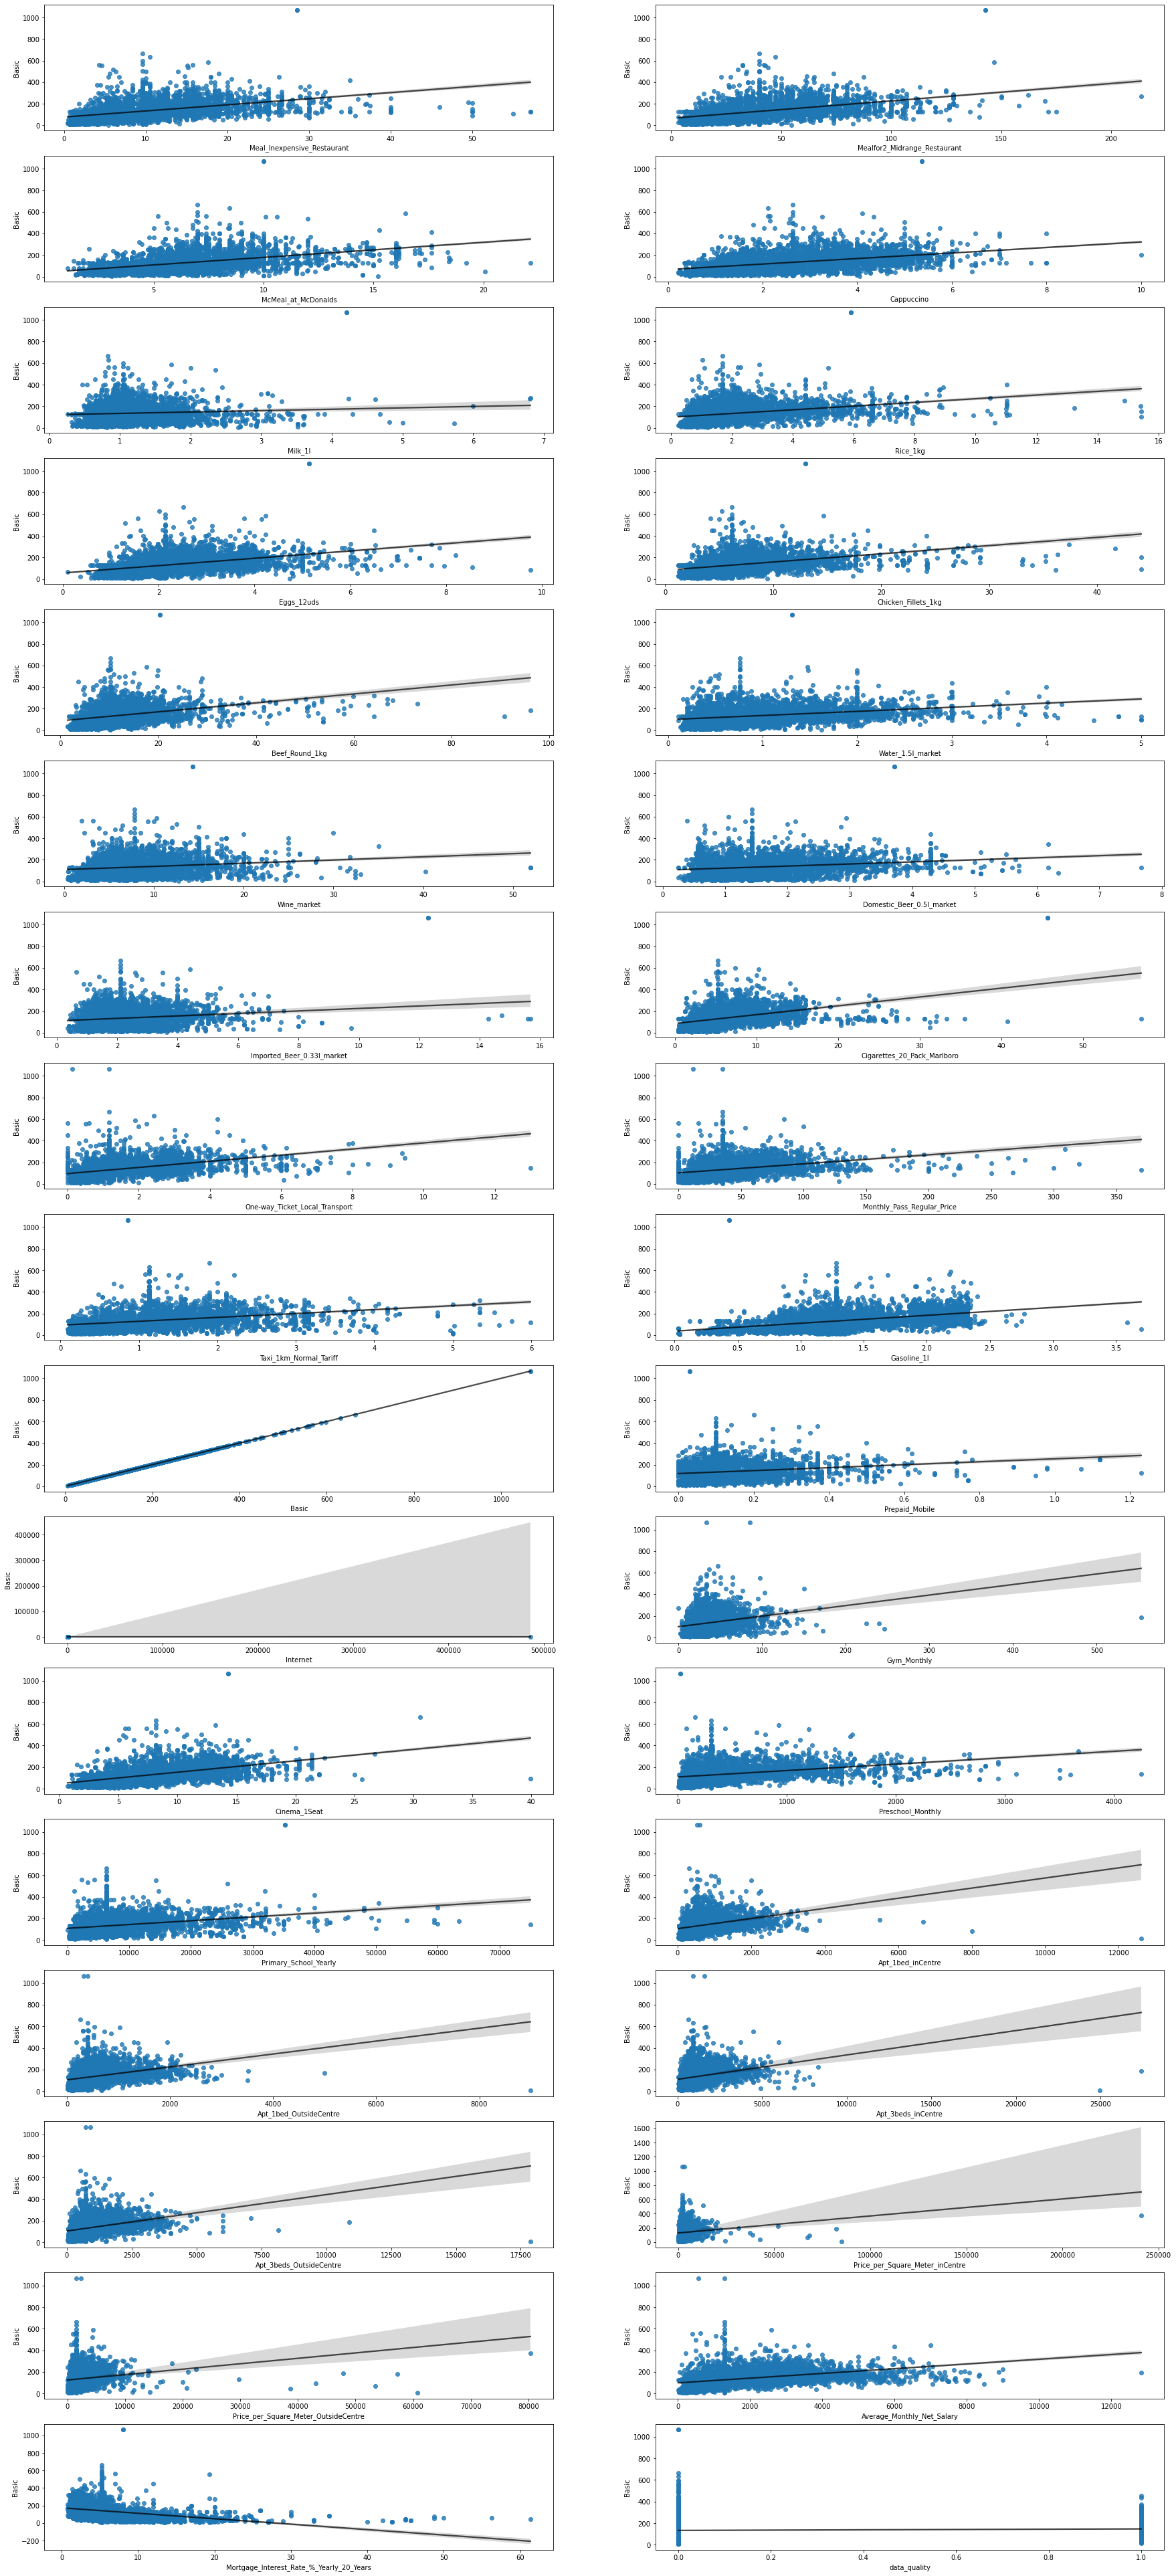

In [89]:
fig, axes = plt.subplots(17,2, figsize = (30, 70))
axes = axes.flat

columnas_numeric = numericas.columns

for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = numericas,
        x = colum,
        y = 'Basic',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])

In [94]:
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
# numericas_col = df.select_dtypes(include = np.number).drop("Basic", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas.columns:
    # calculamos el p-valor de test
    statistic, p_val = levene(numericas[col], numericas.Basic, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [95]:
resultados

{'Meal_Inexpensive_Restaurant': 0.0,
 'Mealfor2_Midrange_Restaurant': 0.0,
 'McMeal_at_McDonalds': 0.0,
 'Cappuccino': 0.0,
 'Milk_1l': 0.0,
 'Rice_1kg': 0.0,
 'Eggs_12uds': 0.0,
 'Chicken_Fillets_1kg': 0.0,
 'Beef_Round_1kg': 0.0,
 'Water_1.5l_market': 0.0,
 'Wine_market': 0.0,
 'Domestic_Beer_0.5l_market': 0.0,
 'Imported_Beer_0.33l_market': 0.0,
 'Cigarettes_20_Pack_Marlboro': 0.0,
 'One-way_Ticket_Local_Transport': 0.0,
 'Monthly_Pass_Regular_Price': 0.0,
 'Taxi_1km_Normal_Tariff': 0.0,
 'Gasoline_1l': 0.0,
 'Basic': 1.0,
 'Prepaid_Mobile': 0.0,
 'Internet': 0.5440523905550569,
 'Gym_Monthly': 0.0,
 'Cinema_1Seat': 0.0,
 'Preschool_Monthly': 3.8654142067071806e-269,
 'Primary_School_Yearly': 0.0,
 'Apt_1bed_inCentre': 4.39820416117e-312,
 'Apt_1bed_OutsideCentre': 2.161424061033076e-294,
 'Apt_3beds_inCentre': 5.134021740805493e-290,
 'Apt_3beds_OutsideCentre': 4.3208e-318,
 'Price_per_Square_Meter_inCentre': 8.458025508221896e-62,
 'Price_per_Square_Meter_OutsideCentre': 2.1917148

3- Independencia de las variables